In [27]:
import json
datastore = [json.loads(line)
        for line in open('Sarcasm_Headlines_Dataset.json', 'r', encoding='utf-8')]
    
sentences =[]
labels=[]
urls =[]

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])
    


In [33]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
#will create token for every words of the headline which is stored in sentences
tokenizer = Tokenizer(oov_token = "<OOV>")
tokenizer.fit_on_texts(sentences)
#this will create the words indexes
word_index = tokenizer.word_index

In [40]:
#now creating the sequence of tokens
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding='post')
print(padded[0])
print(padded.shape)

[  308 15115   679  3337  2298    48   382  2576 15116     6  2577  8434
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
(26709, 40)


In [73]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [59]:
'''now to test its effectiveness over the neural networks, we have to ensures
that the neural network sees only the training data not the test data. hence,let's 
rewrite the code once again so that the tokenizer just fit to the training data. .
'''

#dividing the senetences and lables into training and test datasets

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

training_labels = labels[0:training_size]
testing_labels = labels[training_size:]
len(training_sentences)

20000

In [67]:
#instantiate the tokenizers
tokenizer = Tokenizer(num_words= vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(training_sentences)
#creating the indexes for the tokens
word_index = tokenizer.word_index

#tokenising training sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen = max_length,
                               padding = padding_type,truncating= trunc_type)
#tokensing test sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen = max_length,
                              padding = padding_type, truncating= trunc_type)


In [68]:
'''embedding is a learned representation of a set of discrete symbols. 
In the context of neural networks, an embedding is a dense vector representation 
of a categorical variable, such as a word or a discrete symbol. Embeddings can
be learned as part of a neural network model and can be used to improve the performance
of the model on a downstream task. For example, word embeddings, such as word2vec or GloVe,
are learned representations of words that can be used as input to a neural network model
for tasks such as language translation or text classification. Similarly, character embeddings
can be learned and used to represent characters in a language model or text classifier.'''

import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [79]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length= max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation ='relu'),
    tf.keras.layers.Dense(1,activation ='sigmoid')
])

''' ***loss: a function that measures the error between the predicted output 
and the true output. You can use the binary_crossentropy loss function for 
binary classification tasks.

***optimizer: an algorithm used to update the model weights based on the gradient
of the loss function. The Adam optimizer is a popular choice for many tasks.

***metrics: a list of metrics to evaluate the model during training and testing. 
The accuracy metric will compute the fraction of correctly classified samples.'''

model.compile(loss = 'binary_crossentropy', optimizer = 'adam',metrics=['accuracy'])

In [81]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d_4   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_8 (Dense)             (None, 24)                408       
                                                                 
 dense_9 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [82]:
num_epochs = 30
history= model.fit(training_padded, training_labels, epochs = num_epochs,
                  validation_data = (testing_padded, testing_labels),verbose=2)

Epoch 1/30
625/625 - 5s - loss: 0.6816 - accuracy: 0.5591 - val_loss: 0.6550 - val_accuracy: 0.5657 - 5s/epoch - 9ms/step
Epoch 2/30
625/625 - 2s - loss: 0.5131 - accuracy: 0.7786 - val_loss: 0.4168 - val_accuracy: 0.8305 - 2s/epoch - 4ms/step
Epoch 3/30
625/625 - 2s - loss: 0.3450 - accuracy: 0.8584 - val_loss: 0.3639 - val_accuracy: 0.8481 - 2s/epoch - 3ms/step
Epoch 4/30
625/625 - 2s - loss: 0.2872 - accuracy: 0.8878 - val_loss: 0.3469 - val_accuracy: 0.8550 - 2s/epoch - 3ms/step
Epoch 5/30
625/625 - 2s - loss: 0.2505 - accuracy: 0.9028 - val_loss: 0.3407 - val_accuracy: 0.8562 - 2s/epoch - 3ms/step
Epoch 6/30
625/625 - 2s - loss: 0.2221 - accuracy: 0.9145 - val_loss: 0.3526 - val_accuracy: 0.8460 - 2s/epoch - 3ms/step
Epoch 7/30
625/625 - 2s - loss: 0.1987 - accuracy: 0.9247 - val_loss: 0.3510 - val_accuracy: 0.8520 - 2s/epoch - 3ms/step
Epoch 8/30
625/625 - 2s - loss: 0.1797 - accuracy: 0.9311 - val_loss: 0.3558 - val_accuracy: 0.8541 - 2s/epoch - 2ms/step
Epoch 9/30
625/625 - 2s 

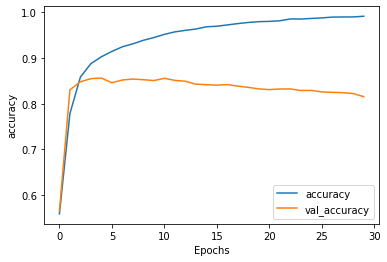

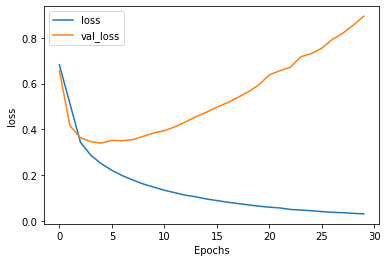

In [84]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [86]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1


In [88]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [90]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [91]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

In [92]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

1/1 [==============================] - 0s 110ms/step
[[9.7335345e-01]
 [6.1373529e-04]]
